In [8]:
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

sys.path.append("../modules/")
from DS_models_stat import cut_cat, make_histogram
%config InlineBackend.figure_format = 'retina'

In [12]:
matplotlib.rcParams["font.size"] = 15

In [7]:
true_cat_dict = {
    '6' : cut_cat(pd.read_csv('../Data/original_cats/eROSITA.csv'), big_pix=[6]),
    '38' : cut_cat(pd.read_csv('../Data/original_cats/eROSITA.csv'), big_pix=[38]),
    'east' : pd.read_csv('../Data/original_cats/eROSITA.csv')
    }

for name in true_cat_dict:
    df = true_cat_dict[name]
    df.rename(columns={'flux_05-20' : 'flux'}, inplace=True)
    df['log'] = np.log(df['flux'])
    df['log10'] = np.log10(df['flux'])
    df['exp'] = np.exp(df['flux'])

In [15]:
counts = {}
bins = {}
n_bins = 40
for prm in ['flux', 'log', 'exp', 'log10']:
    counts[prm] = {}
    
    df = true_cat_dict['east']
    minv = df[prm].min()
    maxv = df[prm].max()
    dif = (maxv-minv)/n_bins
    b = np.arange(minv, maxv+dif, dif)
    bins[prm] = b
    for name in true_cat_dict:
        df = true_cat_dict[name]
        c, _ = np.histogram(df[prm], b)
        counts[prm][name] = c

Text(0.5, 64.0, '$F_{X,0.5−2},\\; erg/s/cm^2$')

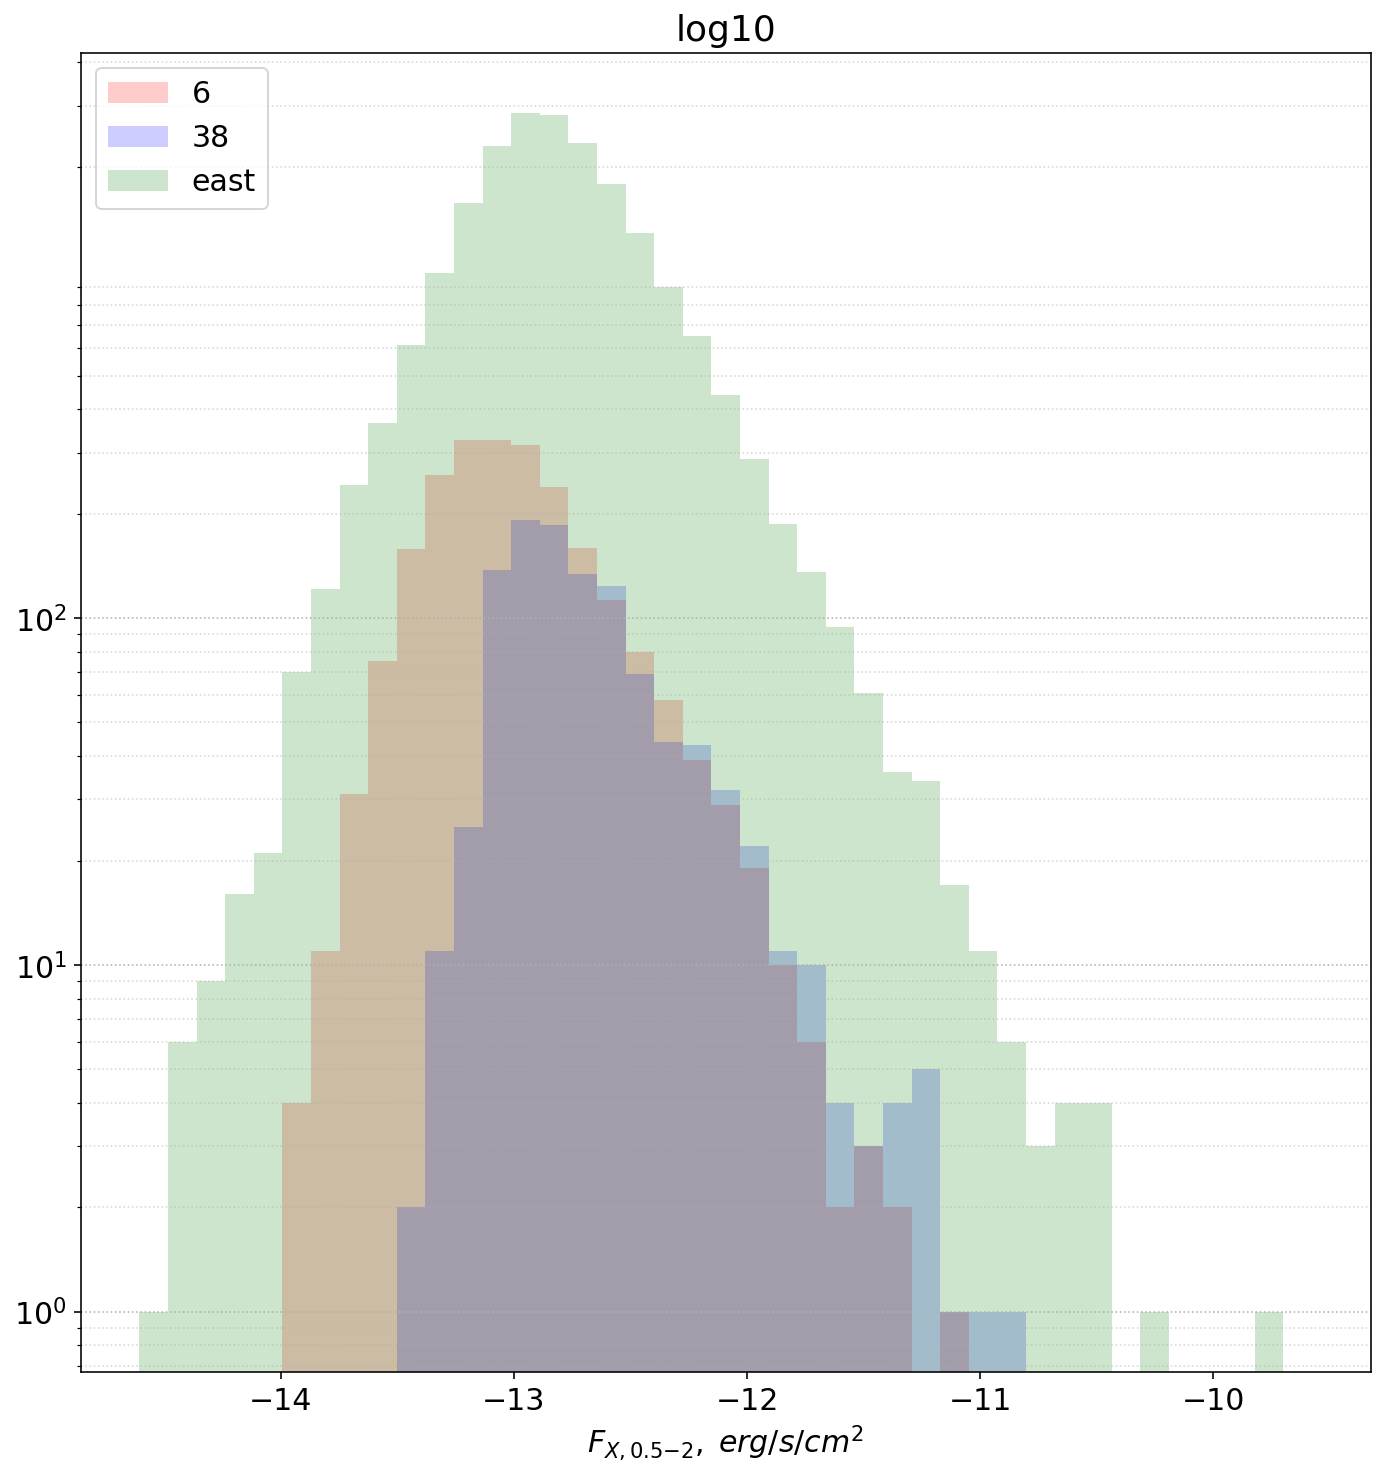

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.tight_layout()
prm='log10'
make_histogram(ax, list(counts[prm].values()), bins[prm], label_list=list(counts[prm].keys()), title=prm, 
               log=True, histtype='stepfilled', alpha=0.2)
ax.set_yticks([10 ** i for i in range(3)])
ax.grid(axis='y', which='major', linestyle=':', alpha=1)
ax.grid(axis='y', which='minor', linestyle=':', alpha=0.5)
ax.set_xlabel('$F_{X,0.5−2},\; erg/s/cm^2$')